<a href="https://colab.research.google.com/github/Sanmuga/Iris-flower-classification/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
iris_df = pd.read_csv("/content/Iris.csv")

In [ ]:
print(iris_df.head)

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [ ]:
print(iris_df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print(iris_df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
print(iris_df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [ ]:
X = iris_df.iloc[:,1:5].values
y = iris_df['Species'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importances= rf_classifier.feature_importances_

In [ ]:
print("Feature Importances:")
for feature_name, importance in zip(iris_df.columns[1:5], feature_importances):
    print(f"{feature_name}: {importance:.4f}")

Feature Importances:
SepalLengthCm: 0.1081
SepalWidthCm: 0.0304
PetalLengthCm: 0.4400
PetalWidthCm: 0.4215


In [ ]:
N = 2
top_features_indices = feature_importances.argsort()[-N:][::-1]
X_train_selected = X_train[:, top_features_indices]
X_test_selected = X_test[:, top_features_indices]

In [ ]:
k_values = list(range(1,21))
mean_scores=[]

In [ ]:
for i in k_values:
  knn_classifier=KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
  mean_scores.append(scores.mean())

In [ ]:
best_k = k_values[mean_scores.index(max(mean_scores))]
print(f'The best k value is {best_k}')

The best k value is 1


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.36666666666666664
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        10
Iris-versicolor       0.00      0.00      0.00         9
 Iris-virginica       0.37      1.00      0.54        11

       accuracy                           0.37        30
      macro avg       0.12      0.33      0.18        30
   weighted avg       0.13      0.37      0.20        30



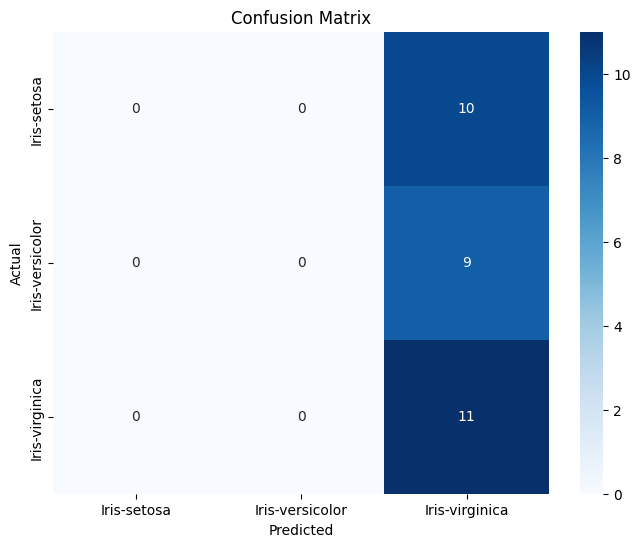

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris_df['Species'].unique(), yticklabels=iris_df['Species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

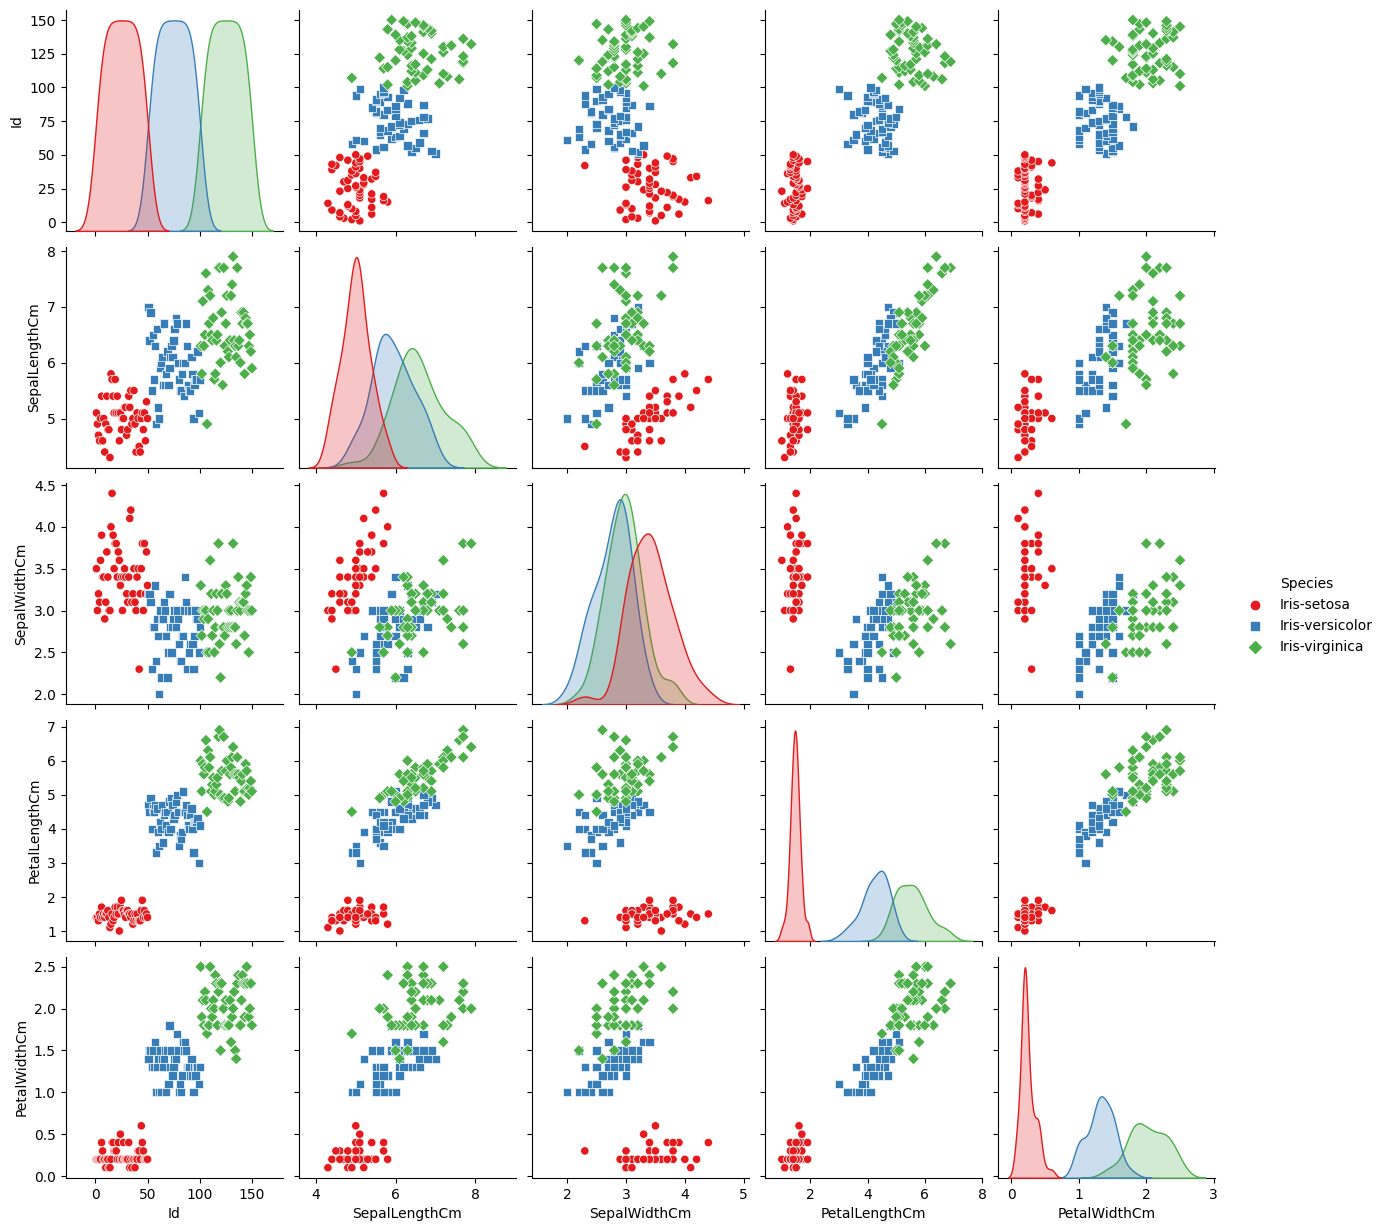

In [ ]:
sns.pairplot(iris_df, hue='Species', markers=['o','s','D'],palette='Set1')
plt.show()

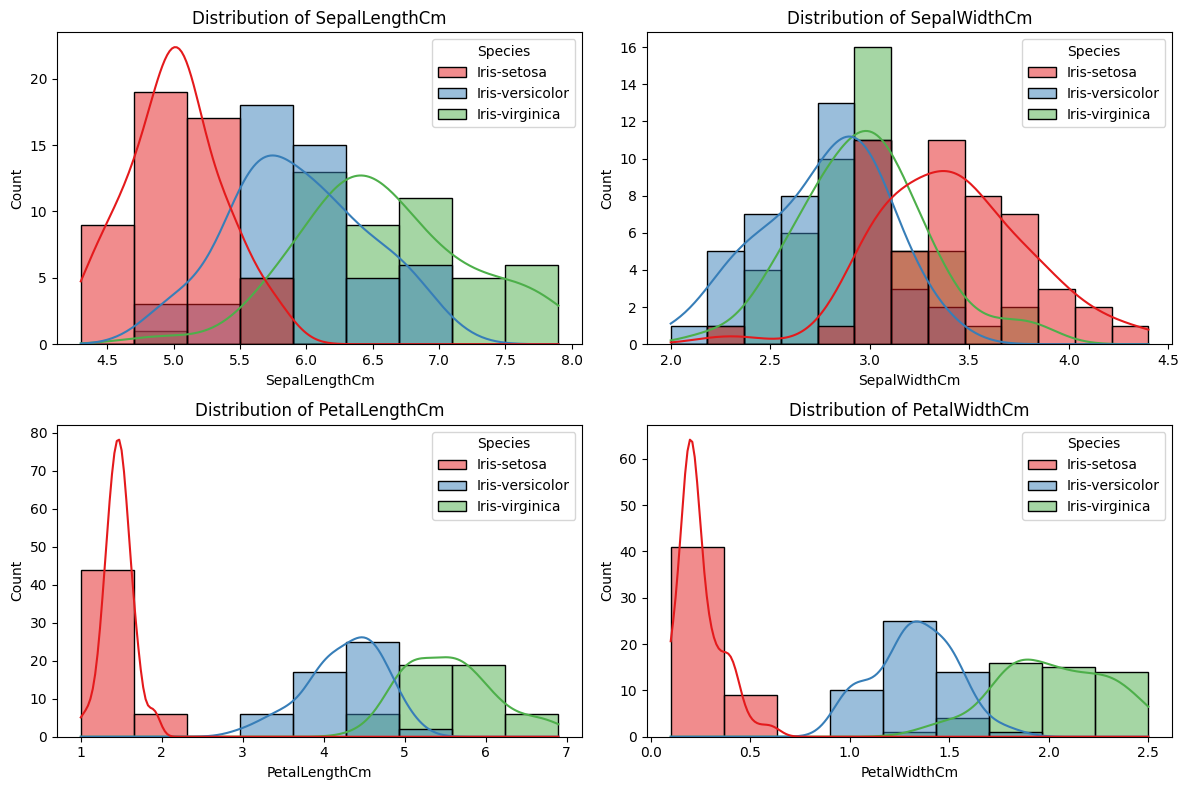

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_df.columns[1:5]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, hue='Species', kde=True, palette='Set1')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()
